# Final project

Blair Lee, Benjamin Liu

Professor Kassab

## Imports and configuration

In [61]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, callbacks

In [48]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Data exploration

Each row corresponds to a 28x28 image. There are 784 features, each corresponding to the shade of a single pixel of this object. Our target variable is a label from 0 to 9.

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Let's see what a few of these images look like:

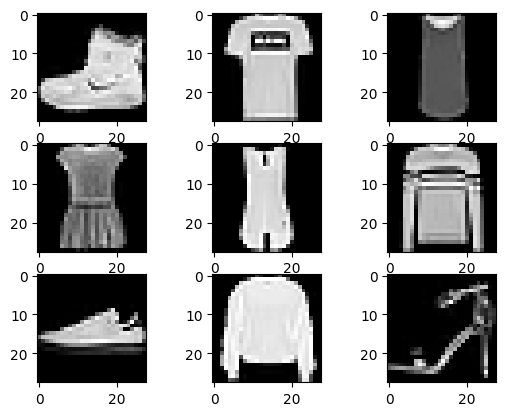

In [50]:
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

Let's normalize every value of the pixel intensities to be between [0, 1] from [0, 255]. We can do this by just dividing through by 255.

In [51]:
X_train = X_train / 255
X_test = X_test / 255

Instead of implementing our layers from scratch, we will be using the keras Sequential() environment.

In [52]:
model = models.Sequential()

We will be using the following layers:
* ReLU with 32 feature maps, convolutional
* 2x2 pooling
* ReLU with 64 feature maps, convolutional
* 2x2 pooling
* ReLU with 64 feature maps, convolutional
* ReLU with 256 neurons, fully connected
* ReLU with 128 neurons, fully connected
* Softmax with 10 neurons, fully connected, which generates our prediction

In [53]:
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())

model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

## Training

In [56]:
# Only edit these variables, don't hard code anything!
EARLY_STOPPING_THRESHOLD = 10
NUM_BATCHES = 20
NUM_EPOCHS = 100
TEST_SIZE = 0.2

In [57]:
early_stoppage_rule = callbacks.EarlyStopping(patience = EARLY_STOPPING_THRESHOLD)
batch_size = X_train.shape[0] // NUM_BATCHES

model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

train_result = model.fit(X_train,
                         y_train,
                         batch_size = batch_size,
                         epochs = NUM_EPOCHS,
                         callbacks = [early_stoppage_rule],
                         validation_split = TEST_SIZE)


Epoch 1/100


16/16 [==============================] - 5s 256ms/step - loss: 1.7639 - accuracy: 0.4551 - val_loss: 0.9742 - val_accuracy: 0.6423
Epoch 2/100
16/16 [==============================] - 4s 242ms/step - loss: 0.9402 - accuracy: 0.6550 - val_loss: 0.8042 - val_accuracy: 0.7025
Epoch 3/100
16/16 [==============================] - 4s 255ms/step - loss: 0.7498 - accuracy: 0.7188 - val_loss: 0.6803 - val_accuracy: 0.7396
Epoch 4/100
16/16 [==============================] - 4s 256ms/step - loss: 0.6588 - accuracy: 0.7478 - val_loss: 0.6236 - val_accuracy: 0.7572
Epoch 5/100
16/16 [==============================] - 4s 246ms/step - loss: 0.5962 - accuracy: 0.7703 - val_loss: 0.5678 - val_accuracy: 0.7851
Epoch 6/100
16/16 [==============================] - 4s 247ms/step - loss: 0.5457 - accuracy: 0.7939 - val_loss: 0.5427 - val_accuracy: 0.7970
Epoch 7/100
16/16 [==============================] - 4s 257ms/step - loss: 0.5120 - accuracy: 0.8083 - val_loss: 0.5007 - val_accuracy: 0.8

## Analyzing Results

We can plot a loss curve:

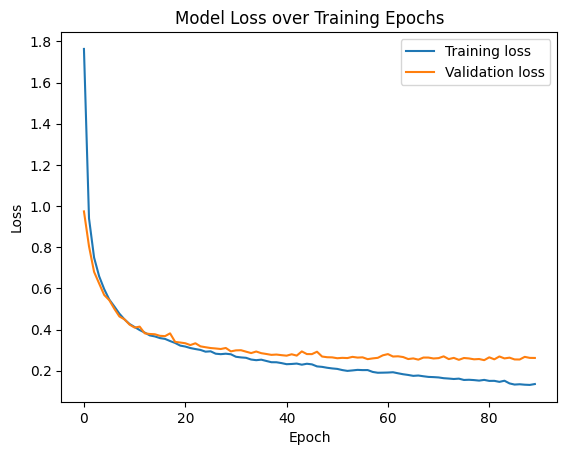

In [58]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('Model Loss over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

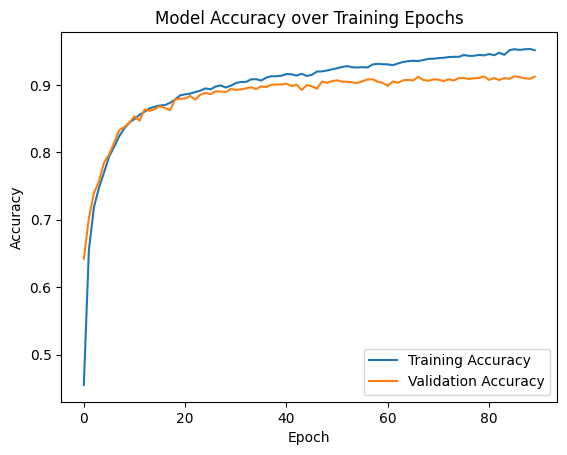

In [59]:
plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('Model Accuracy over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

## Results

We get an accuracy of 91% for our model evaluated on the true out-of-sample test set.

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2776 - accuracy: 0.9107


[0.2775594890117645, 0.9107000231742859]

313/313 [==============================] - 1s 2ms/step


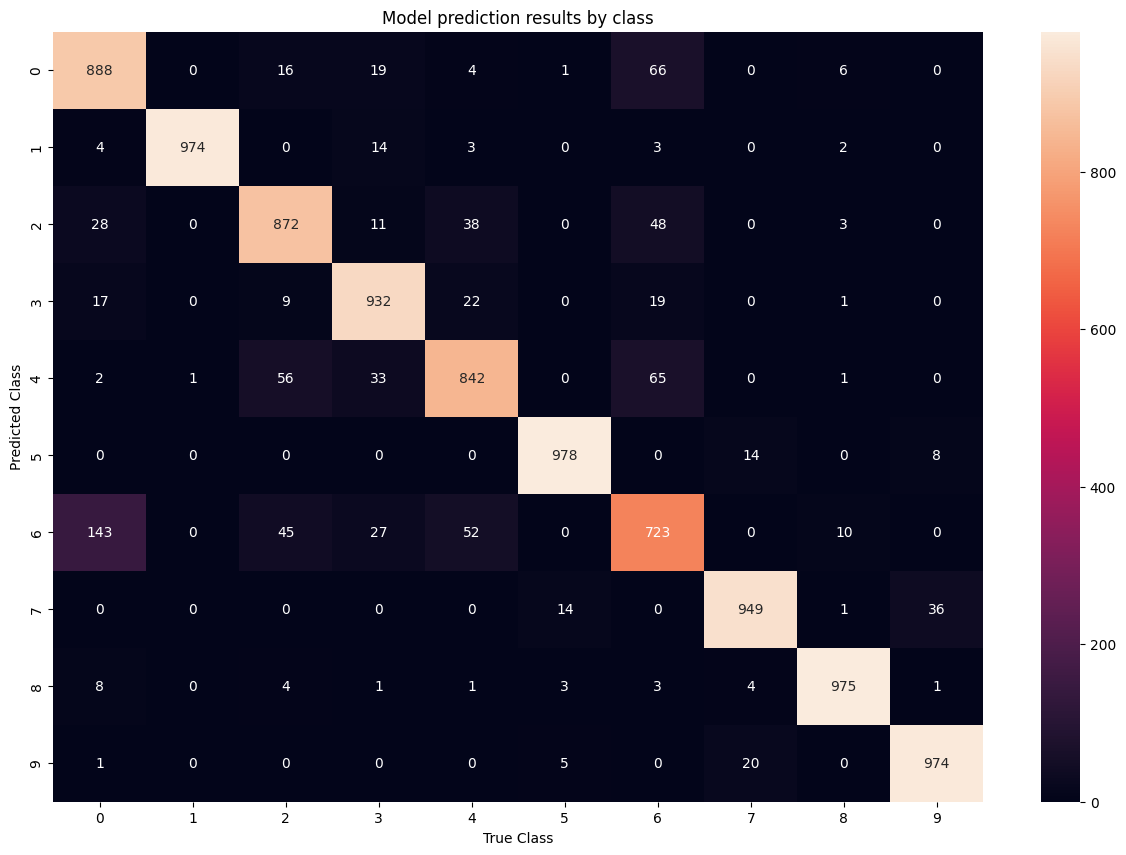

In [64]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
confusion = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize = (15, 10))
sns.heatmap(confusion, annot = True, fmt = 'd')
plt.title('Model prediction results by class')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

We see that our biggest issues are with class 6, which tends to be misclassified as class 0 and vice versa. We can use classification_report to see exactly what these classes are.

In [66]:
class_names = ["Class 0 : T-shirt",
               "Class 1 : Trouser",
               "Class 2 : Pullover",
               "Class 3 : Dress",
               "Class 4 : Coat",
               "Class 5 : Sandal",
               "Class 6 : Shirt",
               "Class 7 : Sneaker",
               "Class 8 : Bag",
               "Class 9 : Ankle Boot"]

print(classification_report(y_test, y_pred_classes, target_names = class_names))

                      precision    recall  f1-score   support

   Class 0 : T-shirt       0.81      0.89      0.85      1000
   Class 1 : Trouser       1.00      0.97      0.99      1000
  Class 2 : Pullover       0.87      0.87      0.87      1000
     Class 3 : Dress       0.90      0.93      0.92      1000
      Class 4 : Coat       0.88      0.84      0.86      1000
    Class 5 : Sandal       0.98      0.98      0.98      1000
     Class 6 : Shirt       0.78      0.72      0.75      1000
   Class 7 : Sneaker       0.96      0.95      0.96      1000
       Class 8 : Bag       0.98      0.97      0.98      1000
Class 9 : Ankle Boot       0.96      0.97      0.96      1000

            accuracy                           0.91     10000
           macro avg       0.91      0.91      0.91     10000
        weighted avg       0.91      0.91      0.91     10000



We see that we are mixing T-shirt and shirt, which is somewhat understandable as the main source of our error.